<img src="../Pics/MLSb-T.png" width="160">
<br><br>
<center><u><H1>Polynomial Regression</H1></u></center>

In [1]:
import numpy as np
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
def f(x):
    return (x**2) * np.sin(x)

In [3]:
# points for plotting:
x_plot = np.linspace(0, 10, 100)

In [4]:
x_plot[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

In [5]:
# changing shapes:
X_plot = x_plot[:, np.newaxis]

In [6]:
X_plot[:10]

array([[0.        ],
       [0.1010101 ],
       [0.2020202 ],
       [0.3030303 ],
       [0.4040404 ],
       [0.50505051],
       [0.60606061],
       [0.70707071],
       [0.80808081],
       [0.90909091]])

In [7]:
y = f(X_plot)

In [9]:
y[:10]

array([[0.        ],
       [0.00102886],
       [0.00818891],
       [0.02740255],
       [0.06417902],
       [0.12341895],
       [0.209232  ],
       [0.32477162],
       [0.47209064],
       [0.65202104]])

#### Ridge Regression: impose a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares

In [10]:
model = make_pipeline(PolynomialFeatures(3), lm.Ridge())
model

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

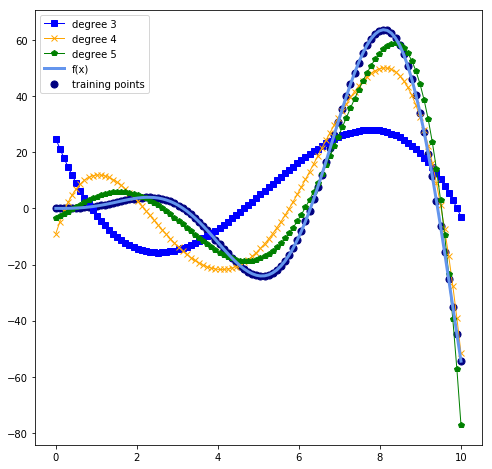

In [11]:
# Drawing multiple models:

plt.figure(figsize=(8,8))
plt.scatter(X_plot, y, color='navy', s=50, marker='o', label="training points")
colors = ['blue','orange','green']
marker = ['s','x','p']

for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), lm.Ridge())
    model.fit(X_plot, y)
    y_plot = model.predict(X_plot)
    plt.plot(X_plot, y_plot, color=colors[count], linewidth=1,
             label="degree %d" % degree, marker=marker[count])

plt.plot(X_plot, f(X_plot), color='cornflowerblue', linewidth=3,
         label="f(x)")
plt.legend(loc='best')

plt.show()

## Reference:

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html